In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print('Fraud:')
print(df.Time[df.Class == 1].describe())
print('Normal:')
print(df.Time[df.Class == 0].describe())

Fraud:
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
Normal:
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


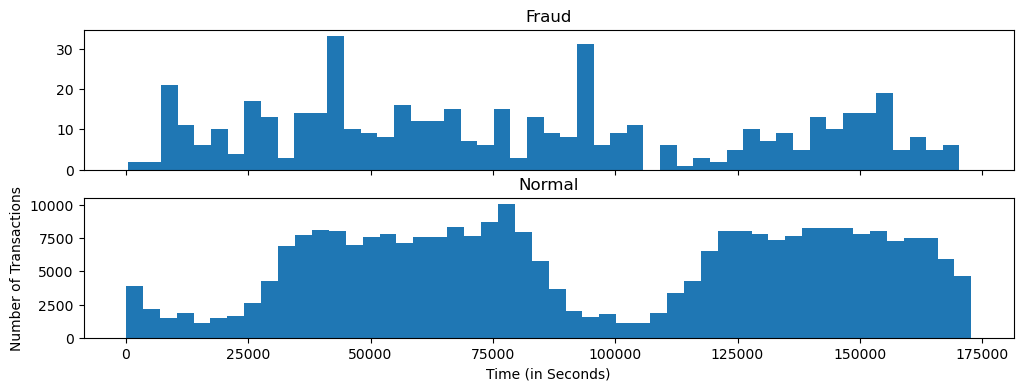

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

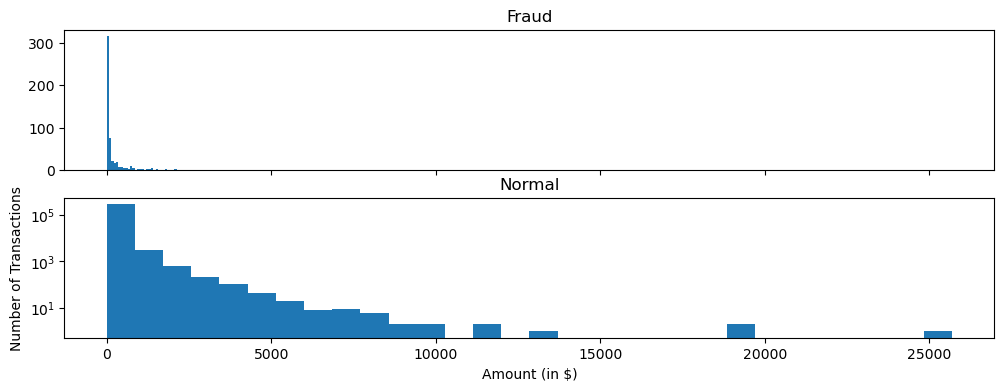

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount (in $)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [10]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

In [11]:
amf = df[df.Amount_max_fraud == 1]
len(amf[amf.Class == 1])

0

In [12]:
v_features = df.iloc[:, 1:29].columns

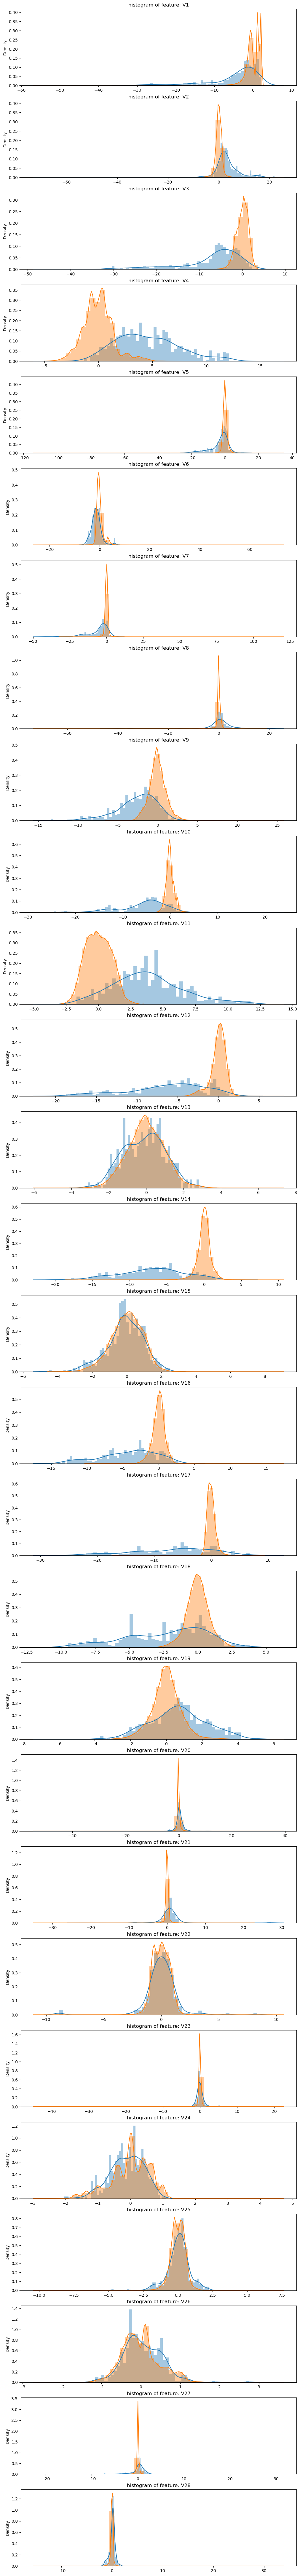

In [13]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [14]:
df = df.drop(['V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8'], axis=1)

In [15]:
df['V1*'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2*'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3*'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4*'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5*'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6*'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7*'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9*'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10*'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11*'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12*'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14*'] = df.V1.map(lambda x: 1 if x < -2.5 else 0)
df['V16*'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17*'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18*'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19*'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21*'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

In [16]:
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [17]:
df = df.rename(columns={'Class': 'Fraud'})

In [18]:
pd.set_option("display.max_columns", 101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Fraud,Amount_max_fraud,V1*,V2*,V3*,V4*,V5*,V6*,V7*,V9*,V10*,V11*,V12*,V14*,V16*,V17*,V18*,V19*,V21*,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [19]:
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [20]:
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

X_test = df.loc[~df.index.isin(X_train.index)]

In [21]:
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [22]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)
y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [23]:
y_train

,Fraud,Normal
112190,0,1.0
71575,0,1.0
68795,0,1.0
231612,0,1.0
193380,0,1.0
...,...,...
96411,0,1.0
196220,0,1.0
72119,0,1.0
221122,0,1.0


In [24]:
y_test

,Fraud,Normal
159432,0,1.0
283315,0,1.0
219399,0,1.0
55552,0,1.0
136184,0,1.0
...,...,...
267005,0,1.0
164380,0,1.0
280343,0,1.0
211505,0,1.0


In [25]:
X_train = X_train.drop(['Fraud', 'Normal'], axis=1)
X_test = X_test.drop(['Fraud', 'Normal'], axis=1)

In [26]:
ratio = len(X_train)/count_Frauds

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [27]:
features = X_train.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

In [28]:
split = int(len(y_test)/2)

inputX = X_train.values
inputY = y_train.values

inputX_valid = X_test.values[:split]
inputY_valid = y_test.values[:split]
inputX_test = X_test.values[split:]
inputY_test = y_test.values[split:]

In [29]:
input_nodes = 37

multiplier = 1.5

hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1*multiplier)
hidden_nodes3 = round(hidden_nodes2*multiplier)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

pkeep = tf.placeholder(tf.float32)

In [30]:
x = tf.placeholder(tf.float32, [None, input_nodes])

W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15))
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15))
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

y = y4
y_ = tf.placeholder(tf.float32, [None, 2])



In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=hidden_nodes1, activation='sigmoid', input_shape = [input_nodes]),
    tf.keras.layers.Dense(units=hidden_nodes2, activation='sigmoid'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                684       
                                                                 
 dense_1 (Dense)             (None, 27)                513       
                                                                 
 dense_2 (Dense)             (None, 2)                 56        
                                                                 
Total params: 1,253
Trainable params: 1,253
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics = ['accuracy']
             )

In [33]:
model.fit(inputX, inputY, epochs=10)

Train on 227846 samples
Epoch 1/10
227846/227846 [==============================] - 9s 39us/sample - loss: 5.6105 - acc: 0.9983
Epoch 2/10
227846/227846 [==============================] - 9s 40us/sample - loss: 5.9075 - acc: 0.9983
Epoch 3/10
227846/227846 [==============================] - 9s 38us/sample - loss: 5.9016 - acc: 0.9983
Epoch 4/10
227846/227846 [==============================] - 9s 39us/sample - loss: 5.1052 - acc: 0.9983
Epoch 5/10
227846/227846 [==============================] - 10s 46us/sample - loss: 5.4217 - acc: 0.9983
Epoch 6/10
227846/227846 [==============================] - 11s 46us/sample - loss: 5.4090 - acc: 0.9983
Epoch 7/10
227846/227846 [==============================] - 10s 45us/sample - loss: 4.9321 - acc: 0.9983
Epoch 8/10
227846/227846 [==============================] - 11s 46us/sample - loss: 5.2662 - acc: 0.9983
Epoch 9/10
227846/227846 [==============================] - 9s 41us/sample - loss: 5.4436 - acc: 0.9983
Epoch 10/10
227846/227846 [=========

In [34]:
training_epochs = 5
training_dropout = 0.9
display_step = 1
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [35]:
cost = -tf.reduce_sum(y_ * tf.log(y))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [36]:
accuracy_summary = []

cost_summary = []
valid_accuracy_summary = []
valid_cost_summary = []
stop_early = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]
            
            sess.run([optimizer], feed_dict={x: batch_x,
                                            y_: batch_y,
                                            pkeep: training_dropout})
            
        if (epoch)%display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, y_: inputY, pkeep: 1})
            
            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, y_:inputY_valid, pkeep: 1})
            
            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
                
    print()
    print("Optimization Finished!")
    print()
            

Epoch: 0 Acc = 0.97262 Cost = 65895.78125 Valid_Acc = 0.97001 Valid_Cost =  5607.93506
Epoch: 1 Acc = 0.97454 Cost = 59654.76562 Valid_Acc = 0.97303 Valid_Cost =  4984.30322
Epoch: 2 Acc = 0.97327 Cost = 55993.04688 Valid_Acc = 0.97177 Valid_Cost =  4932.49512
Epoch: 3 Acc = 0.97663 Cost = 53739.52344 Valid_Acc = 0.97535 Valid_Cost =  4908.54199
Epoch: 4 Acc = 0.97418 Cost = 51111.46875 Valid_Acc = 0.97244 Valid_Cost =  5033.64648

Optimization Finished!



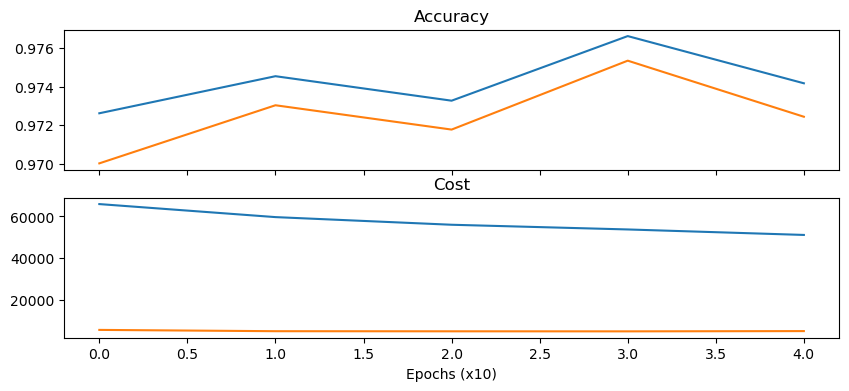

In [37]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary) # blue
ax1.plot(valid_accuracy_summary) # green
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()